# 회귀모델 성능 평가 지표

자동차 속도에 따른 제동거리를 예측하는 회귀 모델을 만들고 성능을 측정해 보자

## #01. 준비작업

### [1] 패키지 참조

In [2]:
import warnings
warnings.filterwarnings(action='ignore')

import sys
import numpy as np
import seaborn as sb
from pandas import read_excel, DataFrame
from matplotlib import pyplot as plt

from sklearn.linear_model import LinearRegression       # 선형회귀분석 모듈
from sklearn.model_selection import train_test_split    # 훈련/검증 데이터 분리 모듈


# 성능 평가 지표 모듈
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

### [2] 그래프 초기화

In [3]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 9
plt.rcParams["figure.figsize"] = (15, 6)
plt.rcParams["axes.unicode_minus"] = False

# ML에서는 그래프가 큰 의미가 없다


### [3] 데이터 가져오기

In [4]:
origin = read_excel("https://data.hossam.kr/mldata/cars.xlsx")
print(origin.info())
origin.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   speed   50 non-null     int64
 1   dist    50 non-null     int64
dtypes: int64(2)
memory usage: 932.0 bytes
None


,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


## #02. 데이터 전처리

### [1] 데이터 분포 확인

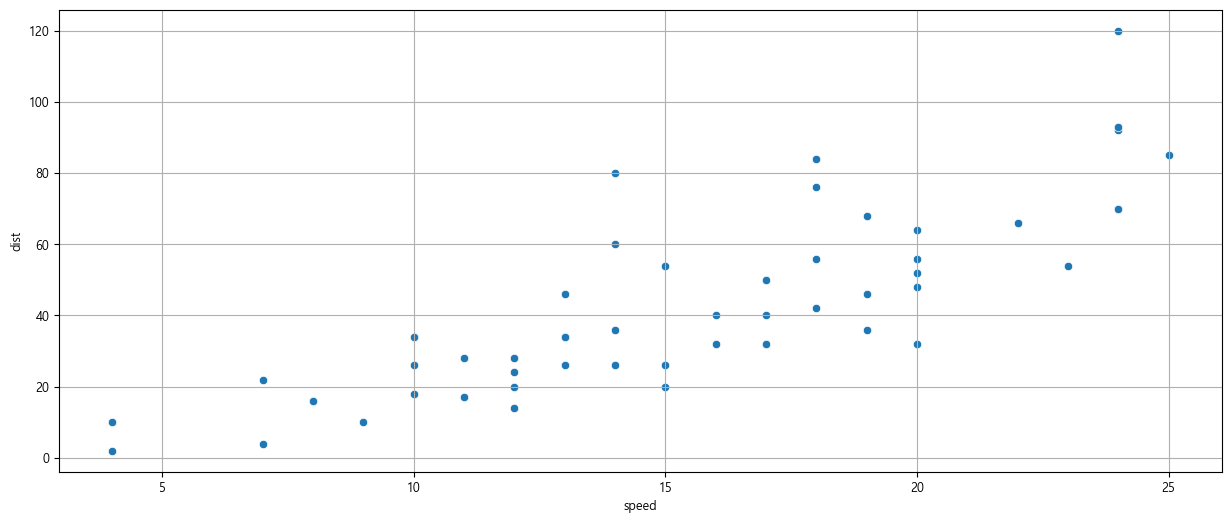

In [5]:
plt.figure()
sb.scatterplot(data=origin, x= 'speed', y = 'dist')
plt.grid()
plt.show()
plt.close()

### [2] 훈련데이터, 검증데이터 분할

In [6]:
x = origin[['speed']]   # 독립변수는 데이터 프레임 형태로 분리
y = origin['dist']      # 종속변수는 시리즈 형태로 분리

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1000)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((35, 1), (15, 1), (35,), (15,))

## #03. 데이터 분석

### [1] 단순선형회귀 모델

In [7]:
model = LinearRegression()
fit = model.fit(x_train, y_train)

print("계수(기울기): ", fit.coef_)
print("절편: ", fit.intercept_)
print("훈련 데이터 설명력: ", fit.score(x_train, y_train))
print("검증 데이터 설명력: ", fit.score(x_test, y_test))

"y = {0:0.2f} * X + {1:0.2f}".format(fit.coef_[0], fit.intercept_)
# 검증데이터의 설명력이 훈련데이터의 설명력보다 높다면 과적합

계수(기울기):  [4.07325839]
절편:  -19.287781054183576
훈련 데이터 설명력:  0.6294978722493831
검증 데이터 설명력:  0.7039855928931559


'y = 4.07 * X + -19.29'

### [2] 분석 결과 확인

#### (1) 훈련, 검증 데이터에 대한 추정치 얻기

In [8]:
y1 = fit.predict(x_train)
y2 = fit.predict(x_test)
y1.shape, y2.shape

((35,), (15,))

#### (2) 분석 결과 시각화

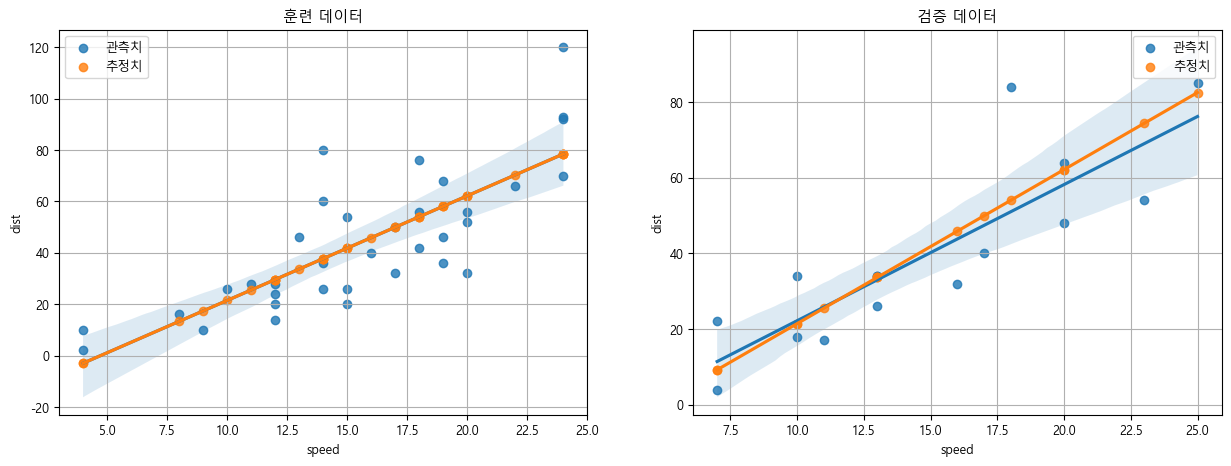

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

sb.regplot(x=x_train['speed'], y=y_train, ci=95, ax=ax1, label='관측치')
sb.regplot(x=x_train['speed'], y=y1, ci=0, ax=ax1, label='추정치')

sb.regplot(x=x_test['speed'], y=y_test, ci=95, ax=ax2, label='관측치')
sb.regplot(x=x_test['speed'], y=y2, ci=0, ax=ax2, label='추정치')

ax1.set_title("훈련 데이터")
ax1.legend()
ax1.grid()

ax2.set_title("검증 데이터")
ax2.legend()
ax2.grid()

plt.show()
plt.close()

## #03. 회귀분석 모델의 성능 평가

회귀분석 모델의 평가를 위한 지표는 검증데이터의 관측치과 그에 대한 추정치의 차이를 기반으로 한다.

| 구분 | 설명 |
|---|---|
| 설명력($R^2$) | 높을 수록 좋음 (1에 가까울 수록 좋음) |
| 에러율 | 낮을 수록 좋음 (0에 가까울 수록 좋음) |

### [1] 설명력 ($R^2$, 결정계수)

회귀분석에서 가장 많이 채택되는 설명력 값

#### (1) `fit.score()` 메서드 사용

기본적으로 모델의 학습 결과를 갖고 있는 `fit`객체의 `score()`메서드에 독립변수와 종속변수를 전달하여 확인할 수 있다.

In [10]:
print("설명력(R2): ", fit.score(x_test, y_test))

설명력(R2):  0.7039855928931559


#### (2) `r2_score()` 메서드 사용

sklearn이 제공하는 `metrics`객체의 `r2_score()` 메서드에 검증 데이터의 관측치와 추정치를 전달하여 조회할 수 있다.

In [11]:
print("설명력(R2): ", r2_score(y_test, y2)) # 파라미터로 실제 데이터값과 예측한 데이터 값을 넣어준다.

설명력(R2):  0.7039855928931559


### [2] 에러율

| 종류   | 이름                             | 한글명            | 잔차계산 | 이상치에 영향 여부 |
|------|--------------------------------|----------------|------|------------|
| MAE  | Mean Absolute Error            | 평균절대오차         | 절대값  | Yes        |
| MSE  | Mean Squared Error             | 평균제곱오차         | 제곱값  | Yes         |
| RMSE | Root Mean Squared Error        | 평균오차           | 제곱값  | No         |
| MAPE | Mean Absolute Percentage Error | 평균 절대 백분 오차 비율 | 절대값  | Yes        |
| MPE  | Mean Percentage Error          | 평균 비율 오차       | N/A  | Yes        |

#### (1) MAE (Mean Absolute Error) : 평균절대오차

$$MAE = \frac{\sum{|y-\hat{y}|}}{n}$$

모델의 추정치와 관측치의 차이에 대한 절대값의 평균이다.

절대값을 취하기 때문에 직관적으로 알 수 있는 지표다.

이상치에 영향을 받지 않는다.

MAE는 절대값을 취하는 지표이기에 실제보다 낮은 값(underperformance)인지 큰 (overperformance)값인지 알 수 없다.

![mae](res/mae.jpg)

In [12]:
print("평균절대오차(MAE): ", mean_absolute_error(y_test, y2))

평균절대오차(MAE):  9.567870745791867


#### (2) MSE (Mean Squared Error) - 평균 제곱 오차

$$
MSE = \frac{\sum{(y-\hat{y})^2}}{n}
$$

MAE와는 다르게 제곱을 하기 때문에 모델의 실제값과 예측값의 차이의 면적의 합이다.

제곱을 하기 때문에 값이 많이 커지므로 해석이 다소 어렵다.

이상치가 존재하면 수치가 많이 늘어난다.( = 이상치에 민감함)

![img](res/mse.jpg)

In [13]:
print("평균제곱오차(MSE): ", mean_squared_error(y_test, y2))


평균제곱오차(MSE):  153.86697319455044


#### (3) RMSE (Root Mean Squared Error) : 평균 오차

$$
RMSE = \sqrt{\frac{\sum{(y-\hat{y})^2}}{n}}
$$

MSE를 구한 값에 루트를 씌운다.

오류 지표를 실제 값과 유사한 단위로 변환하여 해석을 쉽게 한다.

In [14]:
print("평균오차(RMSE): ", np.sqrt(mean_squared_error(y_test, y2)))

평균오차(RMSE):  12.404312685294194


#### (4) MAPE (Mean Absolute Percentage Error) : 평균 절대 백분오차 비율

$$
MAPE = \frac{\sum{|\frac{y-\hat{y}}{y}|}}{n} \times 100\%
$$

MAE를 퍼센트로 변환한 것이다.

MAE와 동일하게 MSE보다 이상치에 민감하며 실제값보다 낮은 값인지 높은 값인지 알 수 없다.

모델에 대한 편향이 있다.(이를 대응하기 위해 MPE도 추가로 확인하는 것을 추천)

![img](res/mape.jpg)

In [15]:
print("평균 절대 백분오차 비율(MAPE): ", np.mean(np.abs((y_test - y2) / y_test) * 100))

평균 절대 백분오차 비율(MAPE):  33.55490571450706


#### $MPE$ (Mean Percentage Error) : 평균 비율 오차

$$
MPE = \frac{\sum{(y-\hat{y})}}{n} \times 100\%
$$

MAPE와 비슷하지만 MAPE에서 절대값을 제외한 지표다.

장점은 모델이 실제값보다 낮은 값인지 큰 값인지 판단 할 수 있다.

![img](res/mpe.jpg)

In [16]:
print("평균 비율 오차(MPE): ", np.mean((y_test - y2) / y_test * 100))

평균 비율 오차(MPE):  -15.103794157199976


## #04. 성능평가지표 일괄 확인

In [17]:
observe = y_test    # 관측치
predict = y2        # 예측치

result = {
    "결정계수(R2)": r2_score(observe, predict),
    "평균절대오차(MAE)": mean_absolute_error(observe, predict),
    "평균제곱오차(MSE)": mean_squared_error(observe, predict),
    "평균오차(RMSE)": np.sqrt(mean_squared_error(observe, predict)),
    "평균 절대 백분오차 비율(MAPE)": np.mean(np.abs((observe - predict) / observe) * 100),
    "평균 비율 오차(MPE)": np.mean((observe - predict) / observe * 100)
}

result_df = DataFrame(result, index=["선형회귀분석"])
result_df

,결정계수(R2),평균절대오차(MAE),평균제곱오차(MSE),평균오차(RMSE),평균 절대 백분오차 비율(MAPE),평균 비율 오차(MPE)
선형회귀분석,0.703986,9.567871,153.866973,12.404313,33.554906,-15.103794
